<a href="https://colab.research.google.com/github/Olasumboor/ml-train/blob/main/Bitcoin_and_ETH_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Log returns.csv to Log returns.csv


In [7]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['Log returns.csv']))
print(df)

     Unnamed: 0       BTC       ETH
0    12/31/2018 -0.040653 -0.057338
1      1/1/2019  0.039229  0.066670
2      1/2/2019  0.016204  0.090924
3      1/3/2019 -0.025809 -0.040519
4      1/4/2019  0.010956  0.040081
..          ...       ...       ...
394   1/29/2020 -0.011010 -0.011679
395   1/30/2020  0.022367  0.058923
396   1/31/2020 -0.017096 -0.026763
397    2/1/2020  0.005135  0.022159
398    2/2/2020 -0.006410  0.025335

[399 rows x 3 columns]


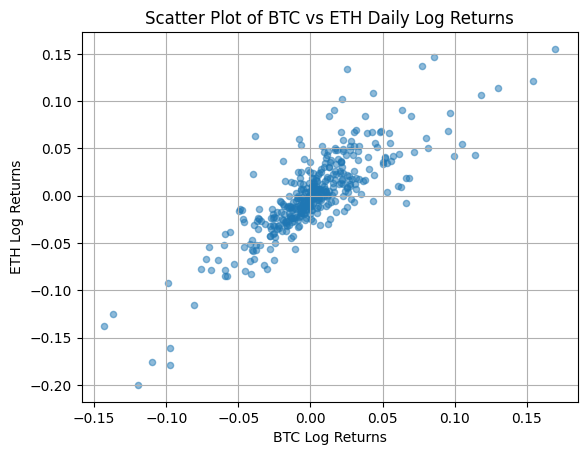

In [8]:
import matplotlib.pyplot as plt

# Create scatter plot
df.plot.scatter(x='BTC', y='ETH', alpha=0.5)
plt.title('Scatter Plot of BTC vs ETH Daily Log Returns')
plt.xlabel('BTC Log Returns')
plt.ylabel('ETH Log Returns')
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['BTC']]  # Independent variable (BTC)
y = df['ETH']    # Dependent variable (ETH)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

print(f"Regression equation: ETH = {beta_0:.6f} + {beta_1:.6f}*BTC")
print(f"Intercept (β₀): {beta_0:.6f}")
print(f"Slope (β₁): {beta_1:.6f}")

Regression equation: ETH = -0.001443 + 0.991088*BTC
Intercept (β₀): -0.001443
Slope (β₁): 0.991088


In [10]:
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared:.4f}")

R-squared value: 0.6856


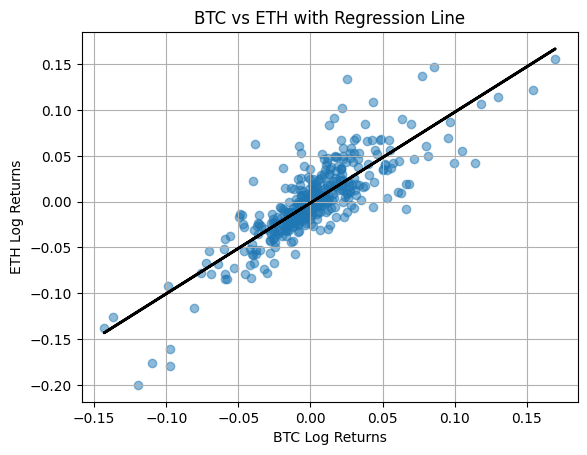

In [12]:
# Create scatter plot
plt.scatter(X, y, alpha=0.5)
plt.title('BTC vs ETH with Regression Line')
plt.xlabel('BTC Log Returns')
plt.ylabel('ETH Log Returns')

# Add regression line
plt.plot(X, model.predict(X), color='black', linewidth=2)

plt.grid(True)
plt.show()